# Statistical Distributions and Confidence Intervals

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

## Use the following information to answer Questions 1 and 2:

> The typicle adult male shoe size follows a normal distribution with a mean of 10.5 and a standard deviation of 1.3.

## Question 1

About 68% of adult men typically have a shoe size between a minimum of  ________ and a maximum of ____________

In [8]:
# Your answer here - fill in the blanks!
print(f'68% minimum is {10.5 - 1.3}')
print(f'68% maximum is {10.5 + 1.3}')

68% minimum is 9.2
68% maximum is 11.8


## Question 2

Suppose Johnny has a shoe size of 8. How many standard deviations is that from the mean?

In [9]:
# Your answer here
print(f'Johnny shoe size is {(8-10.5)/1.3} standard deviations from the mean')

Johnny shoe size is -1.923076923076923 standard deviations from the mean


-----

## Use the following information to answer Questions 3 and 4:


> A random sample of 35 Flatiron Students has a mean of 8.3 hours of sleep with a standard deviation of 3 hours.

## Question 3

Calculate the sample's standard error and the z statistic for a 95% confidence interval. 

In [11]:
# Your code here
se = 3/np.sqrt(35)
se

0.50709255283711

In [12]:
stats.norm.ppf(0.975)

1.959963984540054

## Question 4

What is the 95% confidence interval for the mean number of hours slept by our sample of Flatiron Students?

In [17]:
# Your answer here
stats.t.interval(alpha = 0.95,
                loc = 8.3,
                scale = se,
                df = 35-1)

(7.269463943780879, 9.330536056219122)

In [19]:
mu = 8.3
margin_of_error = stats.norm.ppf(0.975) * se
conf = (mu - margin_of_error, mu + margin_of_error)
print('The 95% confidence interval is ', conf)

The 95% confidence interval is  (7.306116859610791, 9.29388314038921)


-----

## Question 5 - Select the matching distribution

Consider the following distributions:

![6 different distributions, generated by Joel](images/multiple_choice_distributions.png)

Please assign the visualization title letter to the prompt that best matches the data:

1. Normal, symmetrical, visual evidence of outliers.
1. Unimodel, skewed to the right, no apparent outliers.
1. Uniform, asymmetrical, no apparent outliers.
1. Normal, symmetrical, no apparrent outliers.
1. Bimodal, symmetrical, no apparent outliers.
1. Exponential, skewed to the left.

YOUR ANSWER HERE
1:F
2:C
3:A
4:E
5:B
6:D

-----

## Use the following dataset on avocado prices to answer Questions 6, 7 and 8:

In [20]:
# Run this cell without changes
avocados = pd.read_csv('data/avocado.csv')[['AveragePrice']]
avocados.describe()

,AveragePrice
count,18249.000000
mean,1.405978
std,0.402677
min,0.440000
25%,1.100000
50%,1.370000
75%,1.660000
max,3.250000


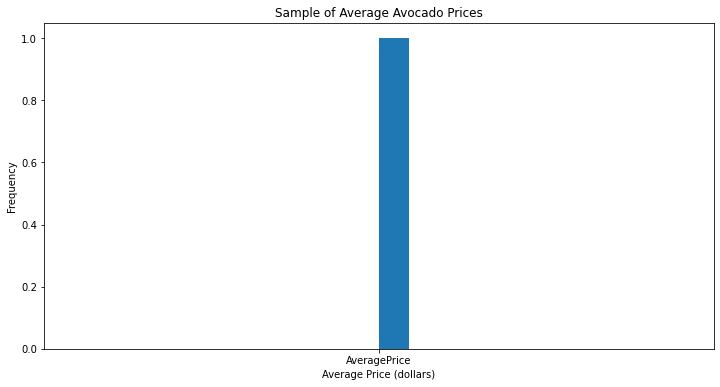

In [21]:
# Run this cell without changes

# Plot a histogram
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Sample of Average Avocado Prices')
ax.set_xlabel('Average Price (dollars)')
ax.set_ylabel('Frequency')
ax.hist(avocados, bins=20)
plt.show()

## Question 6

What is the z-score for an avocado with a price of .55 cents?

In [24]:
# Your code here
(0.55 - avocados['AveragePrice'].mean())/avocados['AveragePrice'].std()

-2.1257219922388457

## Question 7

Assuming the above distribution of avocado prices is roughly normal ('normal enough'), what percent of avocados have a price less than 2 dollars?

In [28]:
# Your code here
two_std = (2.00 - avocados['AveragePrice'].mean())/avocados['AveragePrice'].std()

In [31]:
stats.norm.cdf(two_std)

0.9299183183688599

## Question 8

Assuming the above distribution of avocado prices is roughly normal enough, what range of prices contain the middle 50% of values, also known as the interquartile range (IQR)?

In [36]:
# Your code here
print(stats.norm(avocados['AveragePrice'].mean(), avocados['AveragePrice'].std()).ppf(.75))
print(stats.norm(avocados['AveragePrice'].mean(), avocados['AveragePrice'].std()).ppf(.25))

1.6775796191018908
1.1343772004498653


# LEVEL UP: Bootstrap Sampling

In [ ]:
# Run this cell as is
houses = np.loadtxt('data/prices.csv', delimiter = ',')
houses

We want to find the average home price in King County Washington. Below we read in data from homes across the county and take a sample of 1000. 

In [ ]:
sample = np.random.choice(houses, 1000)

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.title('Sample Home Prices (n=1000)')
plt.xlabel('Home Price ($1M)');

We know we want to construct a confidence interval to provide a better estimate of the mean home price. First, we will need to deal with the non-normally distributed sample taken above. To do this, we can use *bootstrap sampling*. 

Follow the steps below to create a bootstrap sampling distribution which we can use to calculate a 90% confidence interval.

1. Take a bootstrap sample from our original sample with n=1000 (same size as original sample)
2. Calculate the mean of the boostrap sample
3. Repeat this process 10,000 times storing the mean of each bootstrap sample in a list.
4. Plot a distribution of the bootstrap sample means to ensure it reflects a normal distribution
5. Take a 90% confidence interval of the bootstrap sample means

In [ ]:
# Code here for level up part 1

In [ ]:
# Code here for level up part 2

In [ ]:
# Code here for level up part 3

In [ ]:
# Code here for level up part 4

In [ ]:
# Code here for level up part 5